# 作业3：图像的几何变换
- Author: Wei Jiangnan 2024.9
--------------------------------------------------------------------------------------------------------------------------
#### 本作业中，需要你实现以下几何变换：
- 平移：`translate`。
- 镜像：`mirror`。
- 缩放：`scale`。
- 旋转：`rotate`。
--------------------------------------------------------------------------------------------------------------------------
#### 变换中，需要你实现以下插值方法：
- 最近邻插值：`nearest`。
- 双线性插值：`bilinear`。
- 双三次插值：`bicubic`。
- 在图像的缩放和旋转中，会使用到这三个函数进行插值。
- **`[注意]`** 除了读取图像和已经提供的验证代码，不可以调用任何其他opencv的函数。
--------------------------------------------------------------------------------------------------------------------------
**`[注意]`** 注意课件提到的通常的坐标系和numpy中的坐标系的区别。

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

### 1 图像变换
#### 1-1 图像平移 （15）
- 实现一个平移函数`translate`，输入为一个图像img, 以及x方向和y方向的平移距离dx, dy，返回平移后的图像。
- 函数原型为`translate(img, dx, dy)`，其中img为输入图像，dx, dy为平移距离。

In [16]:
def translate(img, dx, dy):
    '''
    Args:
        img: np.array, shape=(h, w, 3), input image
        dx: int, horizontal shift
        dy: int, vertical shift
        
    Returns:
        output: np.array
    '''
    #compete your code here
    h, w = img.shape[0], img.shape[1]
    output_img = np.ones((h + abs(dy), w + abs(dx), 3), dtype=np.uint8)
    trans = np.array([[1, 0, dx], [0, 1, dy], [0, 0, 1]])
    
    for i in range(w):
        for j in range(h):
            ori_pos = np.array([i, j, 1])
            new_pos = np.dot(trans, ori_pos)
            new_x, new_y = new_pos[0], new_pos[1]
            
            if 0 <= new_x < output_img.shape[1] and 0 <= new_y < output_img.shape[0]:
                output_img[new_y, new_x] = img[j, i]
    
    return output_img

#### 1-2 图像镜像 （15）
- 实现一个镜像函数`mirror`，输入为一个图像img, 以及镜像的方向direction，返回镜像后的图像。
- 函数原型为`mirror(img, direction)`，其中img为输入图像，direction为镜像方向，direction='horizonal'时，对图像进行水平镜像，direction='vertical'时，对图像进行垂直镜像。

In [17]:
def mirror(img, direction):
    '''
    Args:
        img: np.array, shape=(h, w, 3), input image
        direction: str, 'horizonal' or 'vertical'
    Returns:
        output: np.array, shape=(h, w, 3)
    '''
    #compete your code here
    h, w = img.shape[0], img.shape[1]
    output_img = np.ones((img.shape), dtype = np.uint8)
    for i in range(h):
        for j in range(w):
            if direction == 'horizonal':
                output_img[i, j] = img[i, w-j-1]
            elif direction == 'vertical':
                output_img[i, j] = img[h-i-1, j]
    return output_img
            

#### 1-3 插值函数 （40）
- 图像的缩放和旋转都需要用到插值函数，本作业中需要你实现三种插值函数：最近邻插值`nearest`，双线性插值`bilinear`，双三次插值`bicubic`。
- **`[注意]`** 对于位置超出图像范围的像素，需要进行特殊处理，本作业中，需要你实现的处理方式为：当位置超出图像范围时，将该像素的值设置为0。


##### 1-3-1 最邻近插值 （5）
- 实现一个最邻近插值函数`nearest`，输入为原图像ori_img, 以及新图像中某像素在原图像中的位置x, y，返回该像素的插值结果。

In [18]:
def nearest(ori_img, x, y):
    '''
    Args:
        ori_img: np.array, shape=(h, w, 3), input image
        x: float, horizontal coordinate
        y: float, vertical coordinate
    Returns:
        np.array, shape=(3), nearest pixel value
    '''
    #compete your code here
    i, j = round(y), round(x)
    if 0 <= i < ori_img.shape[0] and 0 <= j < ori_img.shape[1]:
        return ori_img[i, j]
    else:
        return np.zeros((3), dtype = np.uint8)

##### 1-3-2 双线性插值 （15）
- 实现一个双线性插值函数`bilinear`，输入为原图像ori_img, 以及新图像中某像素在原图像中的位置x, y，返回该像素的插值结果。
- 函数原型为`bilinear(ori_img, x, y)`，其中ori_img为原图像，x, y为新图像中某像素在原图像中的位置。

In [19]:
def bilinear(ori_img, x, y):
    '''
    Args:
        ori_img: np.array, shape=(h, w, 3), input image
        x: float, horizontal coordinate
        y: float, vertical coordinate
    Returns:
        np.array, shape=(3), bilinear interpolated pixel value
    '''
   
    #compete your code here
    # 计算四个顶点坐标
    h, w = ori_img.shape[0], ori_img.shape[1]
    x1, y1 = int(math.floor(x)), int(math.floor(y))
    x2, y2 = min(x1 + 1, w - 1), min(y1 + 1, h - 1)
    if 0 <= x1 < ori_img.shape[1] and 0 <= y1 < ori_img.shape[0] and 0 <= x2 < ori_img.shape[1] and 0 <= y2 < ori_img.shape[0]:
        fx, fy = x - x1, y - y1

        f11 = ori_img[y1, x1]
        f12 = ori_img[y2, x1]
        f21 = ori_img[y1, x2]
        f22 = ori_img[y2, x2]
        
        fq1 = (1 - fx) * f11 + fx * f21
        fq2 = (1 - fx) * f12 + fx * f22
        
        f = (1 - fy) * fq1 + fy * fq2
        # f = f11*(x2-x)*(y2-y) + f21*(x-x1)*(y2-y) + f12*(x2-x)*(y-y1) + f22*(x-x1)*(y-y1)
        return f
    else:
        return np.zeros((3), dtype = np.uint8)
    

##### 1-3-3 双三次插值 （20）
- 实现一个双三次插值函数`bicubic`，输入为原图像ori_img, 以及新图像中某像素在原图像中的位置x, y，返回该像素的插值结果。
- 函数原型为`bicubic(ori_img, x, y)`，其中ori_img为原图像，x, y为新图像中某像素在原图像中的位置。
- 双三次插值的计算公式在课件中已经给出，可以参考课件中的公式进行实现。其中，函数中的`a`取-0.5。

In [20]:

def weight_func(d):
    a = -0.5
    if abs(d) <= 1:
        return (a+2)*abs(d)**3 - (a+3)*abs(d)**2 + 1
    elif abs(d) <= 2:
        return a*abs(d)**3 - 5*a*abs(d)**2 + 8*a*abs(d) - 4*a
    else:
        return 0


def bicubic(ori_img, x, y):
    h, w, _ = ori_img.shape
    
    # 确定左上角基准点（左上角起点为 x0, y0）
    x0, y0 = int(x) - 1, int(y) - 1
    if x0 < 0 or x0 > w - 3 or y0 < 0 or y0 > h - 3:
        return np.zeros((3), dtype=np.uint8)
    ori_img = np.pad(ori_img, ((1, 2), (1, 2), (0, 0)), 'reflect')
    # 计算偏移量
    dx, dy = x - (x0 + 1), y - (y0 + 1)
    
    # 计算 x 和 y 方向上的权重向量
    x_w = np.array([[weight_func(dx + 1), weight_func(dx), weight_func(dx - 1), weight_func(dx - 2)]])
    y_w = np.array([[weight_func(dy + 1)], [weight_func(dy)], [weight_func(dy - 1)], [weight_func(dy - 2)]])
    y_w = y_w.reshape(4, 1)
    # 取出 4x4 的邻域块
    ori_img = ori_img.astype(np.float32)
    neighbor = ori_img[y0:y0 + 4, x0:x0 + 4]
    
    # 初始化结果
    res = np.zeros((3), dtype=np.float32)
    
    # 分通道计算
    for i in range(3):
        temp = np.dot(x_w, neighbor[:, :, i])  # 对 x 方向加权，结果是 (4,)
        res[i] = np.dot(temp, y_w)             # 再对 y 方向加权，结果是一个标量
    
    # 将结果裁剪到合法的像素范围并转换为整数
    res = np.clip(res, 0, 255)
    return res.astype(np.uint8)




#### 1-4 图像缩放 （15）
- 实现一个缩放函数`scale`，输入为一个图像img, 以及x方向和y方向的缩放比例sx, sy，返回缩放后的图像。其中scale>1时，为放大图像，0<scale<1时，为缩小图像。
- 在缩放时，需要对图像进行插值，插值方法可以选择最近邻插值、双线性插值或者双三次插值，分别对应插值方法参数`interpolation`的值为`nearest`、`bilinear`和`bicubic`。
- 函数原型为`scale(ori_img, scale, method)`，其中ori_img为原图像，scale为缩放比例，method为插值方法。
- **`[注意]`** 由于原图像的像素并不能够完全对应到缩放后的图像，通常采用反向映射的方法，即对于缩放后的每一个像素，计算其在原图像中的位置，然后根据这个位置的像素值进行插值。本作业同样采用这种方法。

In [21]:
def scale(ori_img, scale, method):
    '''
    Args:
        ori_img: np.array, shape=(h, w, 3), input image
        scale: float, scale factor
        method: str, 'nearest', 'bilinear' or 'bicubic'
    Returns:
        output: np.array, scaled image
    '''
    #compete your code here
    # 首先计算新图像的大小
    h, w = ori_img.shape[0], ori_img.shape[1]
    new_h, new_w = int(h * scale), int(w * scale)
    new_img = np.zeros((new_h, new_w, 3), dtype = np.uint8)
    # 然后计算新图像对应的坐标
    for i in range(new_w):
        for j in range(new_h):
            if method == 'nearest':
                new_img[j, i] = nearest(ori_img, i/scale, j/scale)
            elif method == 'bilinear':
                new_img[j, i] = bilinear(ori_img, i/scale, j/scale)
            elif method == 'bicubic':
                new_img[j, i] = bicubic(ori_img, i/scale, j/scale)
    return new_img

#### 1-5 图像旋转 （15）
- 实现一个旋转函数`rotate`，输入为一个图像img, 以及旋转角度angle，返回顺时针旋转angle角度后的图像。
- 在旋转时，需要对图像进行插值，插值方法可以选择最近邻插值、双线性插值或者双三次插值，分别对应插值方法参数`interpolation`的值为`nearest`、`bilinear`和`bicubic`。
- 函数原型为`rotate(ori_img, angle, method)`，其中ori_img为原图像，angle为旋转角度，method为插值方法。
- 函数同时还有一个可选参数`expand`，当`expand=True`时，输出图像大小会扩大到刚好能容纳旋转后的图像；当`expand=False`时，输出图像大小不变。`鉴于实现难度，该参数在本作业中不作要求。你只需要将图像绕原点旋转指定角度即可，尽管这样会导致旋转后的图像部分区域超出原图像范围。`
- 有兴趣的同学可以尝试实现旋转后图像大小的自适应调整，即根据旋转角度，自动调整输出图像的大小，使得旋转后的图像不会超出原图像范围。

In [ ]:
def rotate(img, angle, method, expand=False):
    '''
    Args:
        img: np.array, shape=(h, w, 3), input image
        angle: float, rotation angle
        method: str, 'nearest', 'bilinear' or 'bicubic'
        expand: bool, if True, the output image will be expanded to fit the whole image
    Returns:    
        output: np.array, shape=(h, w, 3), rotated image
    '''
    #compete your code here
    # 首先定义图像大小
    h, w =img.shape[0], img.shape[1]
    # 计算旋转后的大小
    if expand:
        pass
    else:
        new_h, new_w = h, w
    new_img = np.ones((new_h, new_w, 3),dtype = np.uint8)
    def rotate_(x, y, angle):
            # 逆时针旋转
            return np.dot(np.array([[math.cos(angle), math.sin(angle)], [-math.sin(angle), math.cos(angle)]]), np.array([x, y]))
    for i in range(new_w):
         for j in range(new_h):
            
            new_x, new_y = rotate_(i, j, angle/180 * math.pi)
            
            if 0 <= new_x < w and 0 <= new_y < h:
                if method == 'nearest':
                    new_img[j, i] = nearest(img, new_x, new_y)
                elif method == 'bilinear':
                    new_img[j, i] = bilinear(img, new_x, new_y)
                elif method == 'bicubic':
                    new_img[j, i] = bicubic(img, new_x, new_y)
    return new_img


### 2 与OpenCV的对比
- 任选一张`非正方形`彩色图像，大小在150*120左右，存放在代码目录下，命名为`test.jpg`。
- 下面的代码会对`test.jpg`进行平移、镜像、缩放和旋转，你需要将这四种变换的结果与OpenCV的结果进行对比，确保你的实现是正确的。
- 结果目视对比，如果你的实现是正确的，那么你的结果应该与OpenCV的结果较为接近，但不需要完全相同。
- **`[注意]`** 不要改动下面的代码，运行代码查看结果即可。

In [23]:
test_img=cv2.imread('./test.jpg')
#交换红蓝通道
B, G, R=cv2.split(test_img)
test_img=cv2.merge([R, G, B])

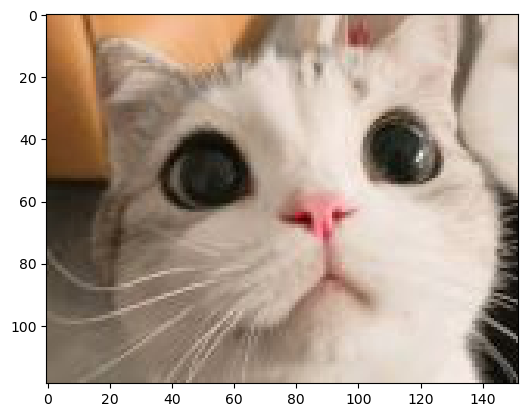

In [24]:
plt.imshow(test_img)

#### 2-1 平移测试


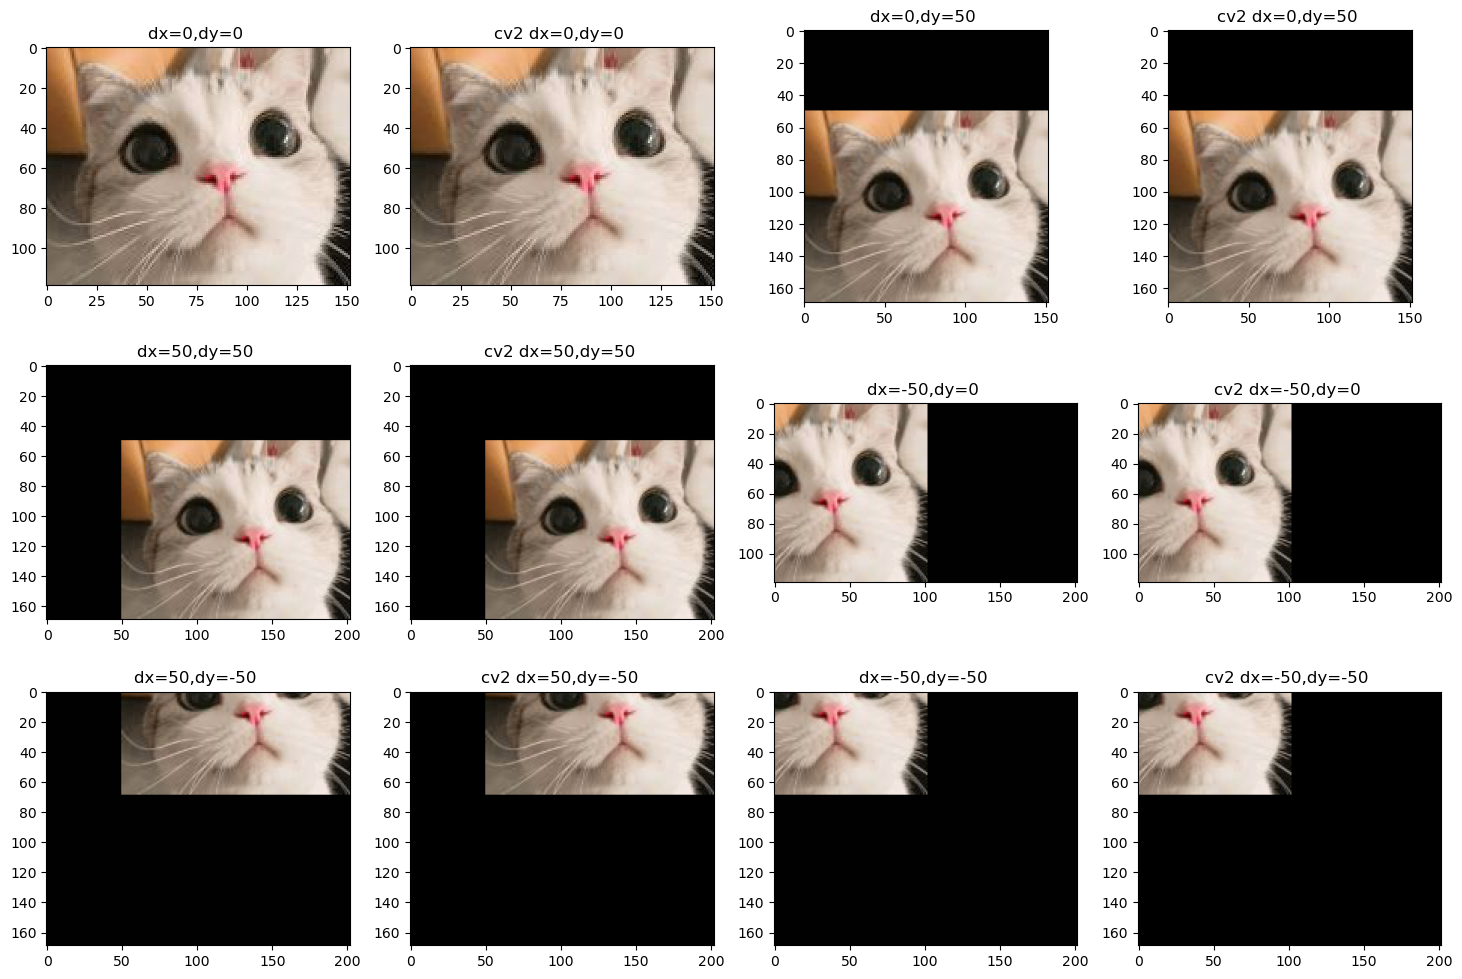

In [25]:
translate_lists=[(0, 0), (0, 50),  (50, 50), (-50, 0), (50, -50), (-50, -50)]
plt.figure(figsize=(18, 12))
for row,trans in enumerate(translate_lists):
    img1 = translate(test_img, trans[0], trans[1])
    h, w, _ = img1.shape
    img2 = cv2.warpAffine(test_img, np.float32([[1, 0, trans[0]], [0, 1, trans[1]]]), (w, h))
    plt.subplot(3,4,row*2+1)
    plt.title('dx={},dy={} '.format(trans[0],trans[1]))
    plt.imshow(img1)
    plt.subplot(3,4,row*2+2)
    plt.title('cv2 dx={},dy={} '.format(trans[0],trans[1]))
    plt.imshow(img2)


#### 2-2 镜像测试

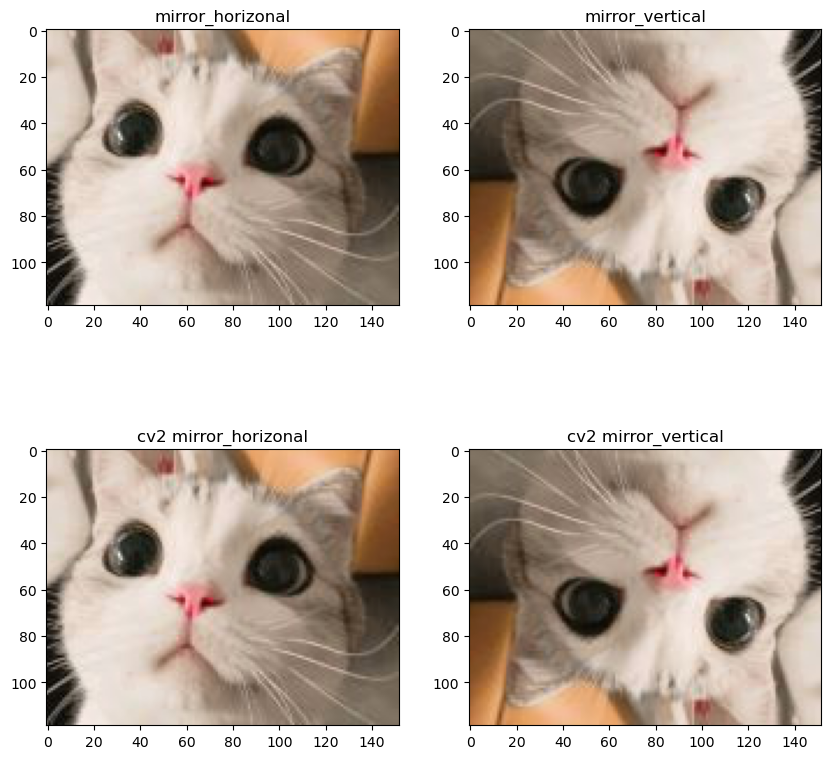

In [26]:
plt.figure(figsize=(10, 10))
mirror_lists=['horizonal', 'vertical']
for row,direction in enumerate(mirror_lists):
    img1 = mirror(test_img, direction)
    img2 = cv2.flip(test_img, 1 if direction == 'horizonal' else 0)
    plt.subplot(2, len(mirror_lists), row+1)
    plt.title('mirror_'+direction)
    plt.imshow(img1)
    plt.subplot(2, len(mirror_lists), len(mirror_lists)+row+1)
    plt.title('cv2 mirror_'+direction)
    plt.imshow(img2)

#### 2-3 缩放测试

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27852\367622336.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res[i] = np.dot(temp, y_w)             # 再对 y 方向加权，结果是一个标量


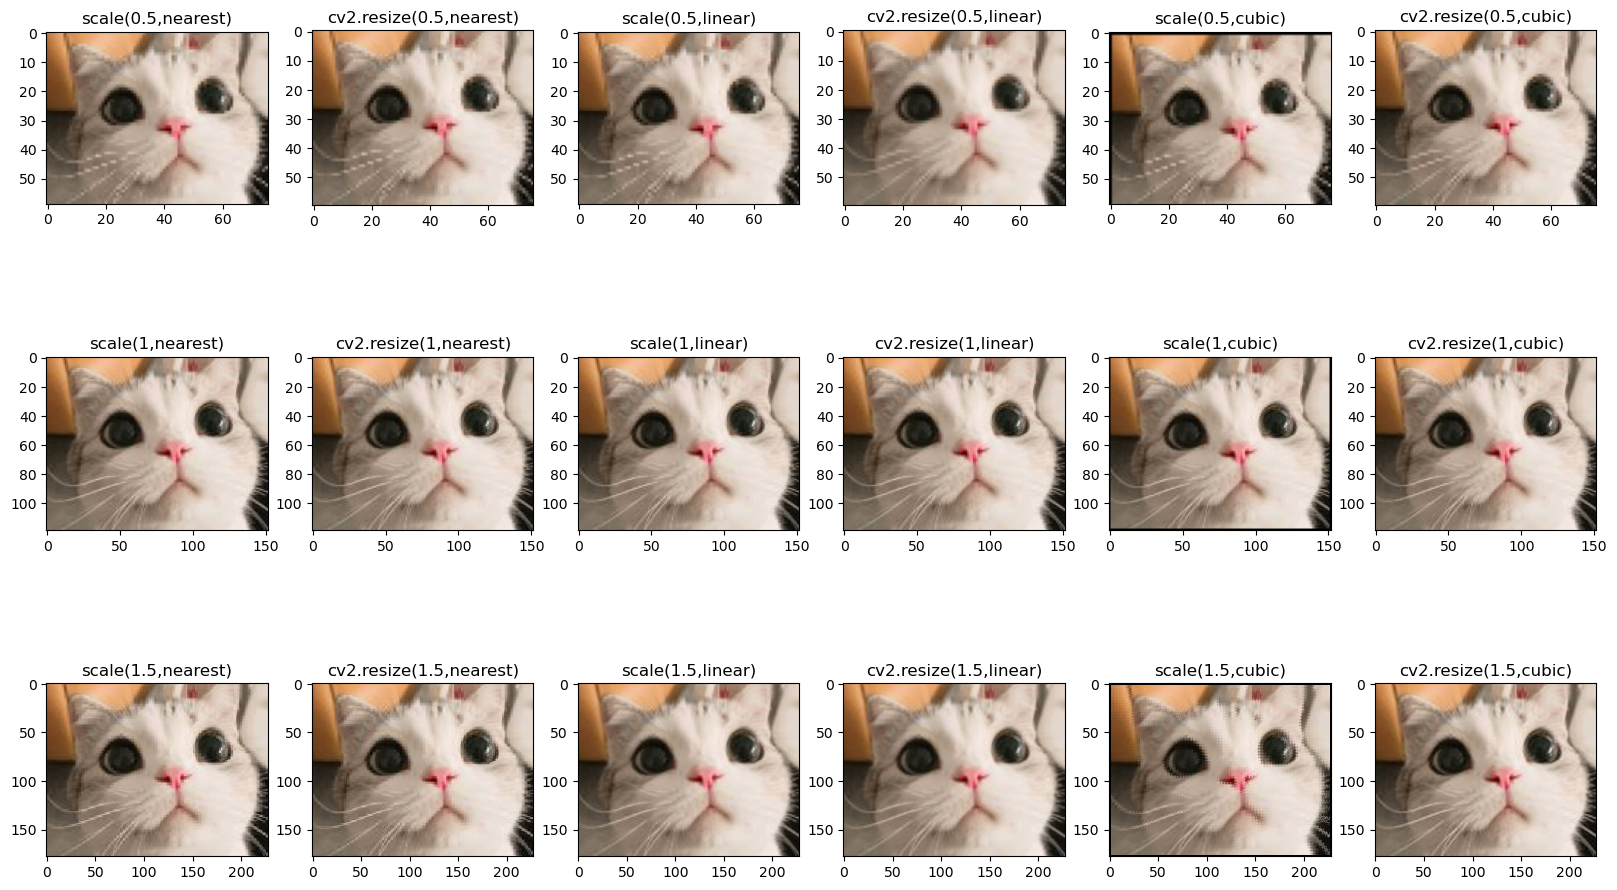

In [27]:
scale_lists=[0.5, 1, 1.5]
method_lists=['nearest', 'bilinear', 'bicubic']
plt.figure(figsize=(20, 12))
for row,resize_scale in enumerate(scale_lists):
    for col,method in enumerate(method_lists):
        img1 = scale(test_img, resize_scale, method)
        if method=='bicubic' or method=='bilinear':
            method=method[2:]
        img2 = cv2.resize(test_img, None, fx=resize_scale, fy=resize_scale, interpolation=getattr(cv2, 'INTER_'+method.upper()))
        plt.subplot(3,6,row*len(method_lists)*2+2*col+1)
        plt.imshow(img1)
        plt.title('scale({},{})'.format(resize_scale, method))
        plt.subplot(3,6,row*len(method_lists)*2+2*col+2)
        plt.imshow(img2)
        plt.title('cv2.resize({},{})'.format(resize_scale, method))

##### 2-4 旋转测试

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27852\367622336.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res[i] = np.dot(temp, y_w)             # 再对 y 方向加权，结果是一个标量


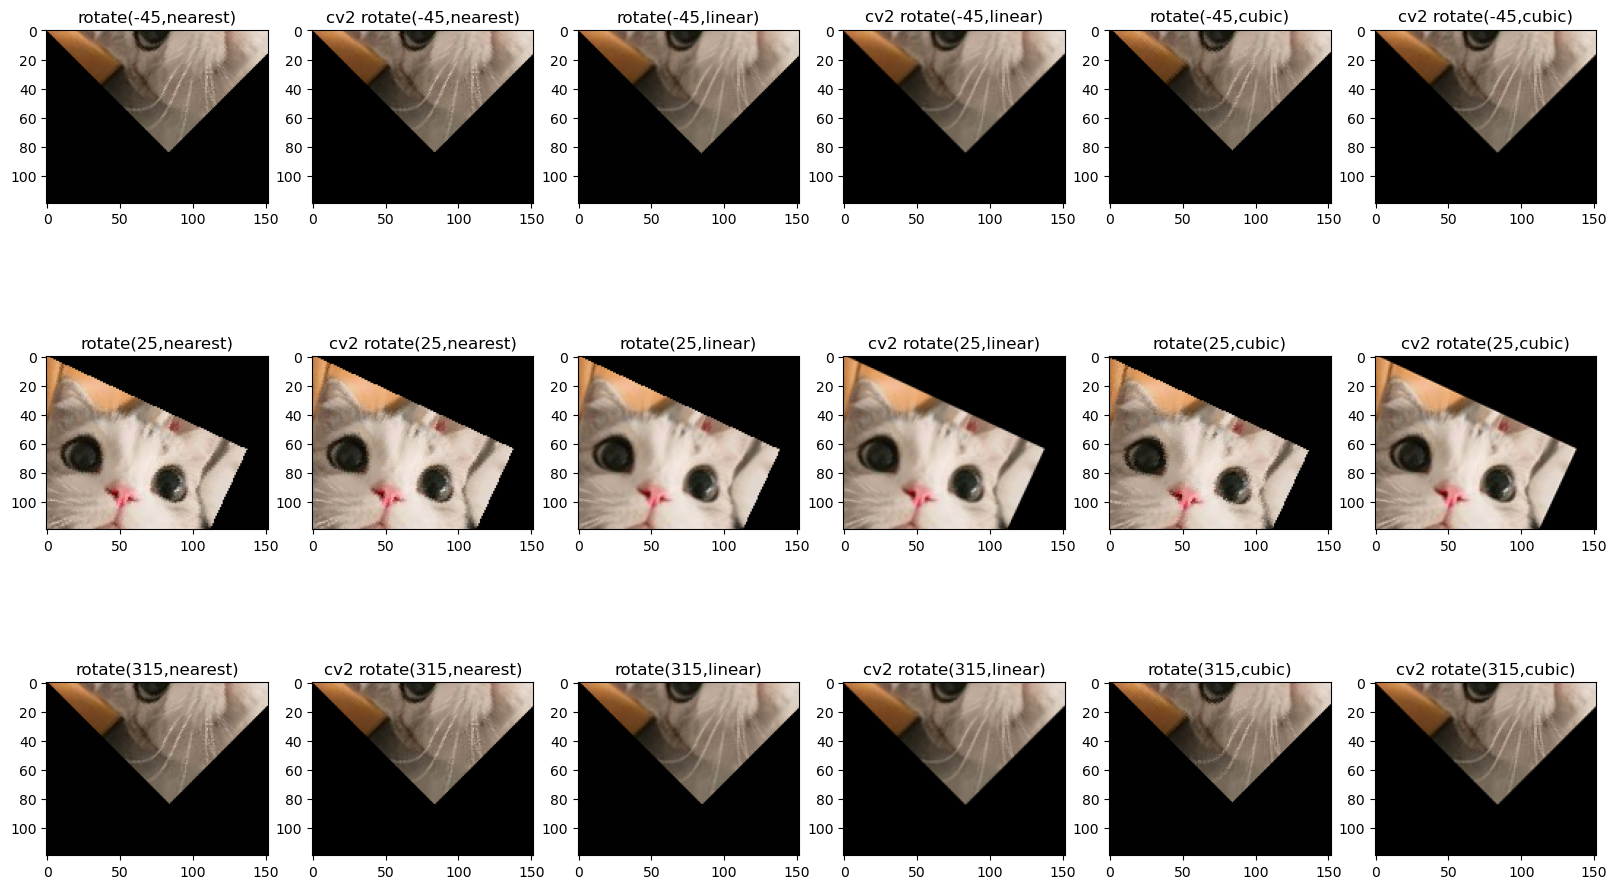

In [28]:
angle_lists=[-45, 25, 315]
method_lists=['nearest', 'bilinear', 'bicubic']
plt.figure(figsize=(20, 12))
for row,angle in enumerate(angle_lists):
    for i,method in enumerate(method_lists):
        img1 = rotate(test_img, angle, method)
        if method=='bicubic' or method=='bilinear':
            method=method[2:]
        img2 = cv2.warpAffine(test_img, cv2.getRotationMatrix2D((0, 0), -angle, 1),\
                                (test_img.shape[1], test_img.shape[0]), flags=getattr(cv2, 'INTER_'+method.upper()))
        plt.subplot(3,6,row*len(method_lists)*2+2*i+1)
        plt.title('rotate({},{})'.format(angle,  method))
        plt.imshow(img1)
        plt.subplot(3,6,row*len(method_lists)*2+2*i+2)
        plt.title('cv2 rotate({},{})'.format(angle, method))
        plt.imshow(img2)

##### 实验收获与感悟
- 请在这里给出你对本次实验的收获与感悟，可以是对本次实验的建议，也可以是对本次实验的心得体会，或者是对本次实验的意见和建议。
+ 本次实验要求实现图像的几何变换操作，包括图像的平移，镜像，旋转，缩放
+ 基本实现方法包括两步：
    + 计算新图像像素点在原图像上的坐标
    + 灰度值重采样
+ 本次实验实现三种重采样方法：
    + 最近邻法
    + 双线性
    + 三次卷积
+ 需要注意的点是采样区域不能超过原图像的边界